In [1]:
%matplotlib inline
import warnings

import matplotlib.pyplot as plt

from nsfdpy.grid import StaggeredGrid
from nsfdpy.field import ScalarField, VectorField
from nsfdpy.plot import StaggeredGridPlot, ScalarFieldPlot, VectorFieldPlot
from nsfdpy.config import Config
from nsfdpy.comp import CompTimeStep
from nsfdpy.ops import Curl


nsfd_config = Config("cavity.yml")

grid = StaggeredGrid(nsfd_config.geometry())
u1 = VectorField(grid, nsfd_config.initial_cond().u())
u2 = VectorField(u1)
p = ScalarField(grid, nsfd_config.initial_cond().p())
resid = []
t = [0]
u_eps = 1e-3

grid_plot = StaggeredGridPlot(grid)
s_plot = ScalarFieldPlot(grid)
vec_plot = VectorFieldPlot(grid)

comp_ts = CompTimeStep(nsfd_config.geometry(),
                   nsfd_config.boundary_cond(),
                   nsfd_config.constants(),
                   nsfd_config.solver(),
                   nsfd_config.time())

resid = 0.0009952446905027847


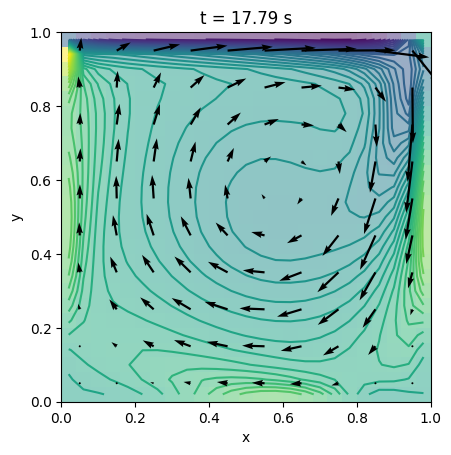

In [2]:
for n in range(10000):

    delt, (n_it, norm) = comp_ts(u2, p)

    if norm > nsfd_config.solver().eps:
        warnings.warn("Computed pressure norm is greater than eps", RuntimeWarning)

    resid.append(u2.resid(u1))
    u1.copy(u2)
    t.append(t[-1] + delt)

    if resid[-1] < u_eps:
        break

print(f"resid = {resid[-1]}")

curl_u = Curl(grid, u2)
vorticity = ScalarField(grid)
for i in range(1, grid.imax + 1):
    for j in range(1, grid.jmax + 1):
        vorticity[i,j] = curl_u(i,j)

fig, ax = plt.subplots()
s_plot.pcolormesh(vorticity, ax=ax, alpha=0.5)
s_plot.contour(vorticity, ax=ax, levels=50)
vec_plot.quiver(u2, shape=(10, 10), ax=ax, zorder=2)
ax.set_aspect("equal", "box")
ax.set_xlabel("x")
ax.set_ylabel("y")
_ = ax.set_title(f"t = {t[-1]:.2f} s")

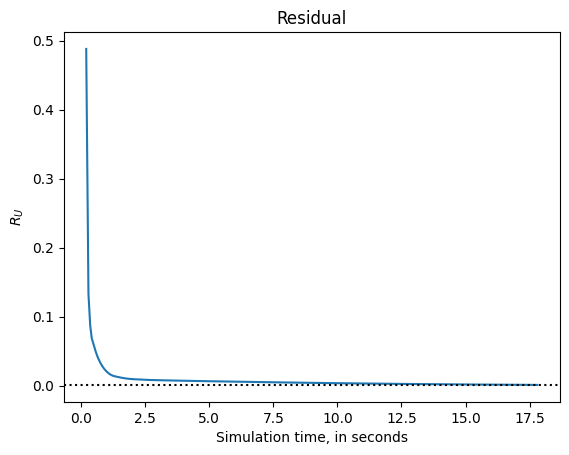

In [3]:
plt.plot(t[1:], resid)
plt.axhline(u_eps, color="k", linestyle=":")
plt.xlabel("Simulation time, in seconds")
plt.ylabel("$R_{U}$")
_ = plt.title("Residual")